In [12]:
import numpy as np
import control as co
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib notebook

### Code for 1(a)

In [28]:
s=co.tf("s")
sys=40/(s*(s+4)*(s+10))
sys

TransferFunction(array([40]), array([ 1, 14, 40,  0]))

In [47]:
sys = signal.TransferFunction([40], [1, 14, 40, 0])
f = np.logspace(-2, 5)
w = 2 * np.pi * f
w, mag, phase = signal.bode(sys,w)
#plt.figure(figsize=(15,5))
plt.semilogx(w, mag, color='r')    # Bode magnitude plot
wc = np.interp(0,np.flipud(phase),np.flipud(mag))
Kcu = np.interp(wc,w,mag)
plt.plot(plt.xlim(),[Kcu,Kcu],'b--')
plt.plot([wc,wc],plt.ylim(),'b--')
plt.title("Gain at Crossover = {0:.3g}dB".format(Kcu))
plt.xlim(left=10**(-1))
plt.xlabel('$\omega$')
plt.ylabel('magnitiude $(dB)$')
# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
plt.grid(which='minor', linestyle='-', linewidth='0.5', color='0.65')
plt.annotate('$(0,-22.9)$',
             xy=(wc,Kcu), xycoords='data',
             xytext=(0.10,0.5), textcoords='axes fraction',
             arrowprops={'arrowstyle':"->", "color":'k'})
plt.title("Gain at Crossover = {0:.3g}".format(Kcu))
# plt.figure(figsize=(8.3,5))
# plt.semilogx(w, phase, color='m')  # Bode phase plot
# plt.plot(plt.xlim(),[-180,-180],'r--')
# plt.plot([wc,wc],plt.ylim(),'r--')
# plt.title("Crossover Frequency = {0:.3g} rad/sec".format(wc))
# plt.xlim(left=10**(-1))
# plt.xlabel('$\omega$')
# plt.ylabel('Phase')
# plt.grid(True, which="both", ls="-", color='0.65')
print(wc)

<IPython.core.display.Javascript object>

24.035159737129238


In [ ]:
#plt.figure(figsize=(8.3,5))
plt.semilogx(w, phase, color='m')  # Bode phase plot
plt.xlim(left=10**(-1))
plt.xlabel('$\omega$')
plt.ylabel('Phase')
plt.title('Phase plot')
plt.grid(True, which="both", ls="-", color='0.65')

### Code for question 2(a)

In [3]:
s=co.tf("s")
G=10/((s+4)*(s+10))
G

TransferFunction(array([10]), array([ 1, 14, 40]))

In [26]:
tau=0.5
N=4 #number of order approximation
num_pade, den_pade=co.pade(tau, N)
G_pade=co.tf(num_pade, den_pade)
G_pade

TransferFunction(array([ 1.000e+00, -4.000e+01,  7.200e+02, -6.720e+03,  2.688e+04]), array([1.000e+00, 4.000e+01, 7.200e+02, 6.720e+03, 2.688e+04]))

<IPython.core.display.Javascript object>


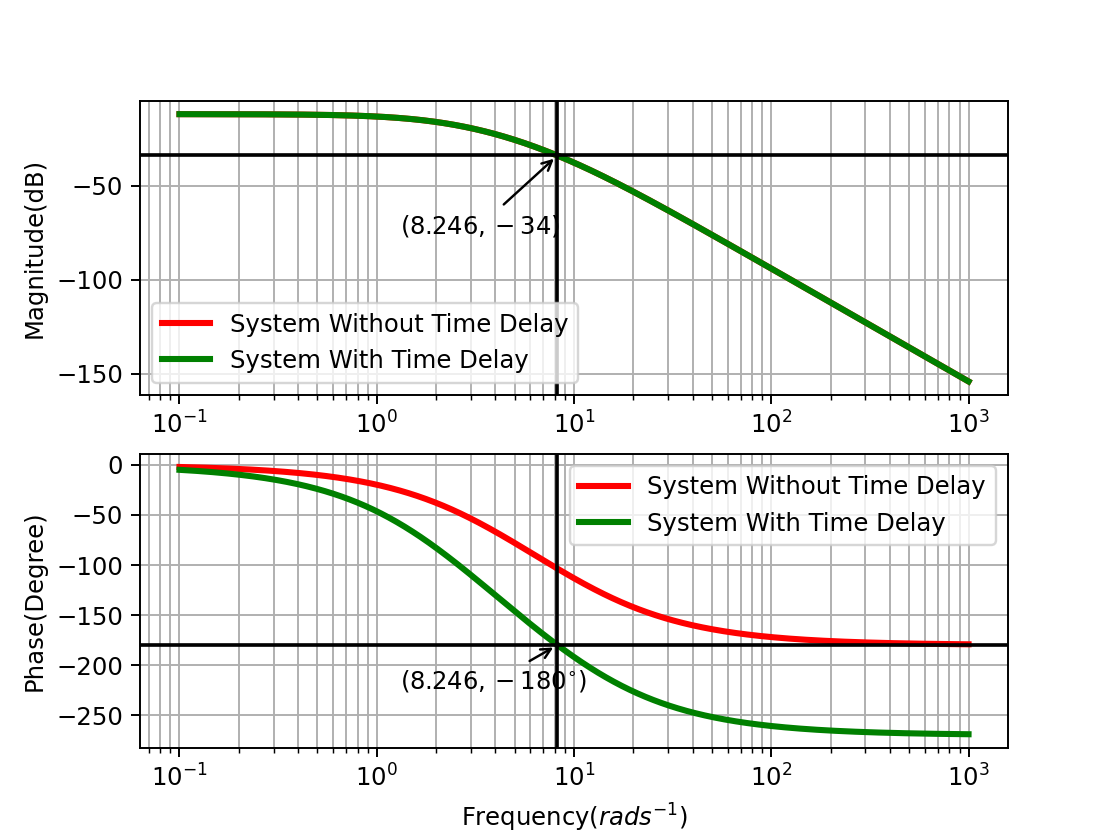

In [20]:
w=np.logspace(-1,3,1000)
tf1=signal.TransferFunction([10],[1,14,40])
omega1,mag1,phase1=signal.bode(tf1,w)

tf2=signal.TransferFunction([10],[0.5,8,34,40])
omega2,mag2,phase2=signal.bode(tf2,w)
fig,ax=plt.subplots(nrows=2)
ax[0].semilogx(omega1,mag2,color='r',label='System Without Time Delay',lw=2.5)
ax[0].semilogx(omega2,mag2,color='g',label='System With Time Delay',lw=2.5)
ax[0].set_ylabel('Magnitude(dB)')
ax[0].axhline(-34,color='k')
ax[0].axvline(8.246,color='k')
ax[0].annotate('$(8.246,-34)$',
            xy=(8.246,-34),
            xytext=(0.3,0.55),
            xycoords="data", 
            textcoords='axes fraction',
            arrowprops={'arrowstyle':"->", "color":'k'})

ax[1].semilogx(w,phase1,color='r',label='System Without Time Delay',lw=2.5)
ax[1].semilogx(w,phase2,color='g',label='System With Time Delay',lw=2.5)
ax[1].set_ylabel('Phase(Degree)')
ax[1].set_xlabel('Frequency($ rad s^{-1}$)')
ax[1].axhline(-180,color='k')
ax[1].axvline(8.246,color='k')
ax[1].annotate('$(8.246,-180^{\circ})$',
            xy=(8.246,-180), xycoords='data',
            xytext=(0.3,0.2), textcoords='axes fraction',color='k',
            arrowprops={'arrowstyle':"->", "color":'k'})
ax[0].legend()
ax[1].legend()
ax[0].grid(True,which='both')
ax[1].grid(True,which='both')
plt.show()


      10
---------------
s^2 + 14 s + 40


            10
---------------------------
0.5 s^3 + 8 s^2 + 34 s + 40



<IPython.core.display.Javascript object>


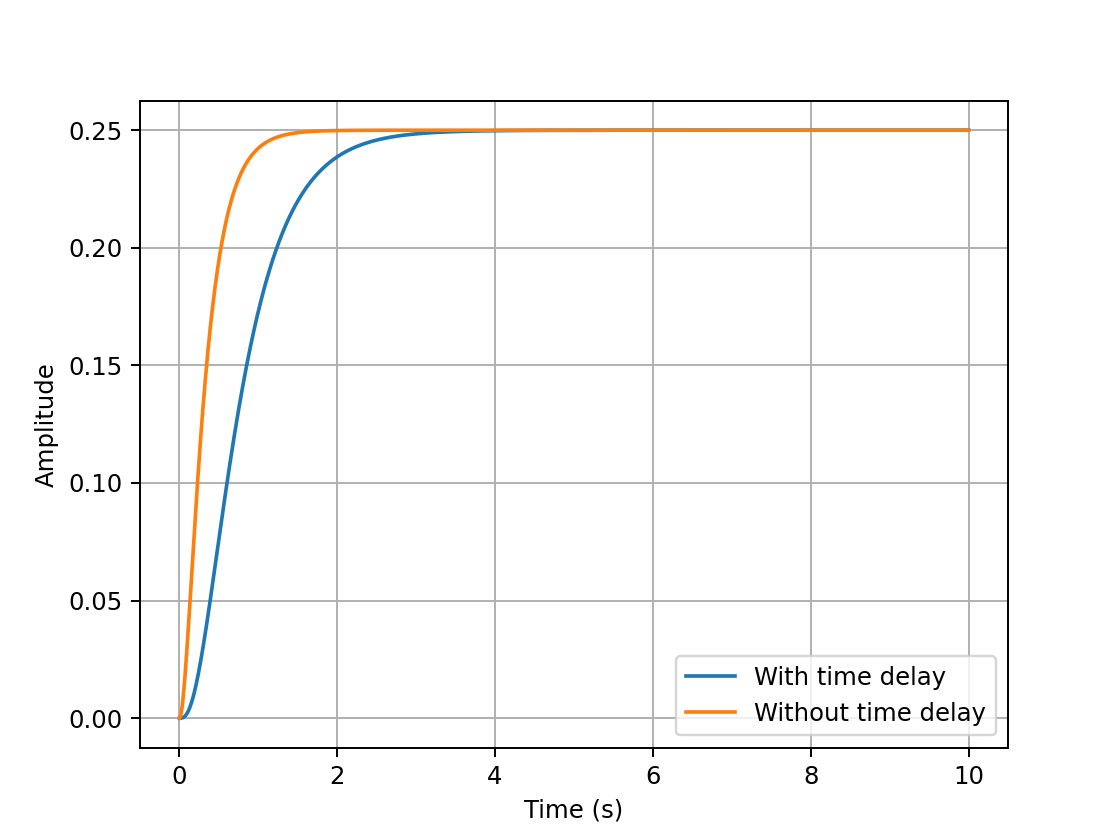

In [25]:
G=co.tf([10],[1,14,40])
print(G)

Gp = co.tf([10],[0.5,8,34,40])
print(Gp)


t = np.linspace(0, 10, 1000)
_,yp=co.step_response(Gp,t)
plt.plot(t,yp, label="With time delay")
_,y=co.step_response(G,t)
plt.plot(t,y, label="Without time delay")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()